In [10]:
#Primero, debemos cargar las librerías que vamos a utilizar:

import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis  ## funciones estadísticas
from sklearn.linear_model import LogisticRegression  ## modelo de regresión logística
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  ## métricas de evaluación
from sklearn.model_selection import train_test_split  ## función para dividir datos en conjuntos de entrenamiento y prueba

Este notbook pretende analizar como es el comportamiento de dos variables de un sistema de informacion de analisis de calidad del aceite que se extrae de la palma de aceite al procesarla. los parametros de calidad son los siguientes:
Humedad, Acidez, temperatura.
Para que el aceite sea optimo para vender debe cumplir con los siguientes parametros. De lo contrario no podra ser vendido ni exportado.
ACIDEZ maximo 5%, HUM+IMP maximo 0.5% temperatura entre 30 y 50 grados.

In [11]:
# Paso 1: Cargar el archivo CSV desde una URL en un DataFrame de Pandas
# Ruta del archivo CSV
ruta_archivo = 'https://raw.githubusercontent.com/claudia-pixel/taller1/main/remcalidad.csv'  # Reemplaza con la ruta de tu archivo CSV
# Cargar el archivo CSV en un DataFrame de Pandas
data = pd.read_csv(ruta_archivo,sep=';')

In [12]:
# Paso 2: Análisis Exploratorio de datos simplificado

print("Información del conjunto de datos:")
print(data.info())

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Remision  555 non-null    int64  
 1   ACI       554 non-null    object 
 2   HUM       555 non-null    object 
 3   IMP       555 non-null    object 
 4   TMP       554 non-null    float64
 5   HUMIMP    555 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 26.1+ KB
None


In [21]:
data.isnull().sum()

,0
Remision,0
ACI,0
HUM,0
IMP,0
TMP,0
HUMIMP,0
Aprobado,0


no faltan valores

reemplazamos la coma por el punto para que no haya confucion con el separador de valores.

In [13]:
data['ACI'] = data['ACI'].str.replace(',', '.')
data['HUMIMP'] = data['HUMIMP'].str.replace(',', '.')
data['IMP'] = data['IMP'].str.replace(',', '.')
data['HUM'] = data['HUM'].str.replace(',', '.')
data

,Remision,ACI,HUM,IMP,TMP,HUMIMP
0,1,1.59,0.16,0.035,34.0,0.195
1,2,1.54,0.16,0.035,36.0,0.195
2,3,1.59,0.16,0.035,40.0,0.195
3,4,1.48,0.18,0.035,36.0,0.215
4,5,1.54,0.16,0.035,42.0,0.195
...,...,...,...,...,...,...
550,555,2.61,0.2,0.03,50.0,0.23
551,556,2.71,0.18,0.03,37.0,0.21
552,557,2.71,0.2,0.03,40.0,0.23
553,558,2.46,0.22,0.03,42.0,0.25


In [14]:
data['ACI'] = data['ACI'].astype(float)
data['HUMIMP'] = data['HUMIMP'].astype(float)
data['IMP'] = data['IMP'].astype(float)
data['HUM'] = data['HUM'].astype(float)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Remision  555 non-null    int64  
 1   ACI       554 non-null    float64
 2   HUM       555 non-null    float64
 3   IMP       555 non-null    float64
 4   TMP       554 non-null    float64
 5   HUMIMP    555 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 26.1 KB
None


In [47]:
print ("Los valores duplicados en data son:" , data.duplicated().sum())

Los valores duplicados en data son: 0


In [23]:
print(data['HUMIMP'].unique())

[ 0.195  0.215  0.175  0.19   0.17   0.2    0.24   0.205  0.22   0.32
  0.255  0.21   0.26   0.235  0.23   0.25   0.28   4.02   0.46   0.055
  0.45   0.34   4.3    0.275  0.3    0.295 35.24   0.59  18.04   2.24
 24.     0.36   0.335  0.18   0.155  0.315  0.37   0.31  20.04   0.27
  0.48   0.29   0.16  16.02 ]


Matriz de correlacion

In [40]:
data.corr()

,Remision,ACI,HUM,IMP,TMP,HUMIMP,Aprobado
Remision,1.000000,0.020651,0.051222,-0.035210,0.293713,0.011927,-0.149844
ACI,0.020651,1.000000,0.393242,0.078584,-0.030882,0.327922,-0.150581
HUM,0.051222,0.393242,1.000000,0.056178,0.015168,0.736576,-0.178572
IMP,-0.035210,0.078584,0.056178,1.000000,-0.036701,0.716666,-0.116288
TMP,0.293713,-0.030882,0.015168,-0.036701,1.000000,-0.014267,-0.321729
HUMIMP,0.011927,0.327922,0.736576,0.716666,-0.014267,1.000000,-0.203513
Aprobado,-0.149844,-0.150581,-0.178572,-0.116288,-0.321729,-0.203513,1.000000


<Axes: xlabel='ACI', ylabel='Aprobado'>

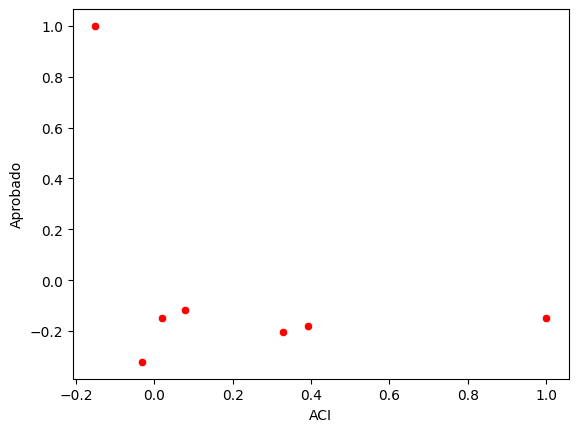

In [50]:
sns.scatterplot(data.corr(), x='ACI', y='Aprobado', color='red')

In [38]:
Matriz_correlacion = np.corrcoef(data['ACI'], data['HUMIMP']) #matriz de correlacion
Matriz_correlacion #matriz de correlacion

array([[1.        , 0.32792241],
       [0.32792241, 1.        ]])

In [15]:
# Paso 3: Preprocesamiento de datos
# Algo de limpieza de datos
# eliminamos los nulos
data = data.dropna()
data

,Remision,ACI,HUM,IMP,TMP,HUMIMP
0,1,1.59,0.16,0.035,34.0,0.195
1,2,1.54,0.16,0.035,36.0,0.195
2,3,1.59,0.16,0.035,40.0,0.195
3,4,1.48,0.18,0.035,36.0,0.215
4,5,1.54,0.16,0.035,42.0,0.195
...,...,...,...,...,...,...
549,554,2.41,0.18,0.030,50.0,0.210
550,555,2.61,0.20,0.030,50.0,0.230
551,556,2.71,0.18,0.030,37.0,0.210
552,557,2.71,0.20,0.030,40.0,0.230


In [16]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 0 to 553
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Remision  554 non-null    int64  
 1   ACI       554 non-null    float64
 2   HUM       554 non-null    float64
 3   IMP       554 non-null    float64
 4   TMP       554 non-null    float64
 5   HUMIMP    554 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 30.3 KB
None


<Axes: title={'center': 'Grafica de Correlacion'}>

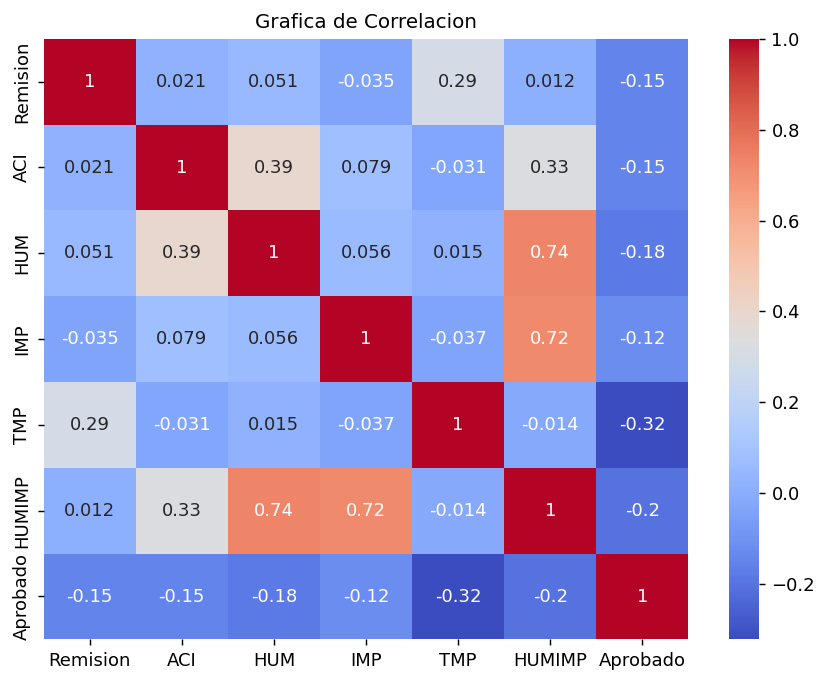

In [45]:
plt.figure (figsize = [8,6],  dpi = 130 )
plt.title ("Grafica de Correlacion" , fontsize = 11 )
sns.heatmap (data.corr(), annot = True , cmap="coolwarm" )

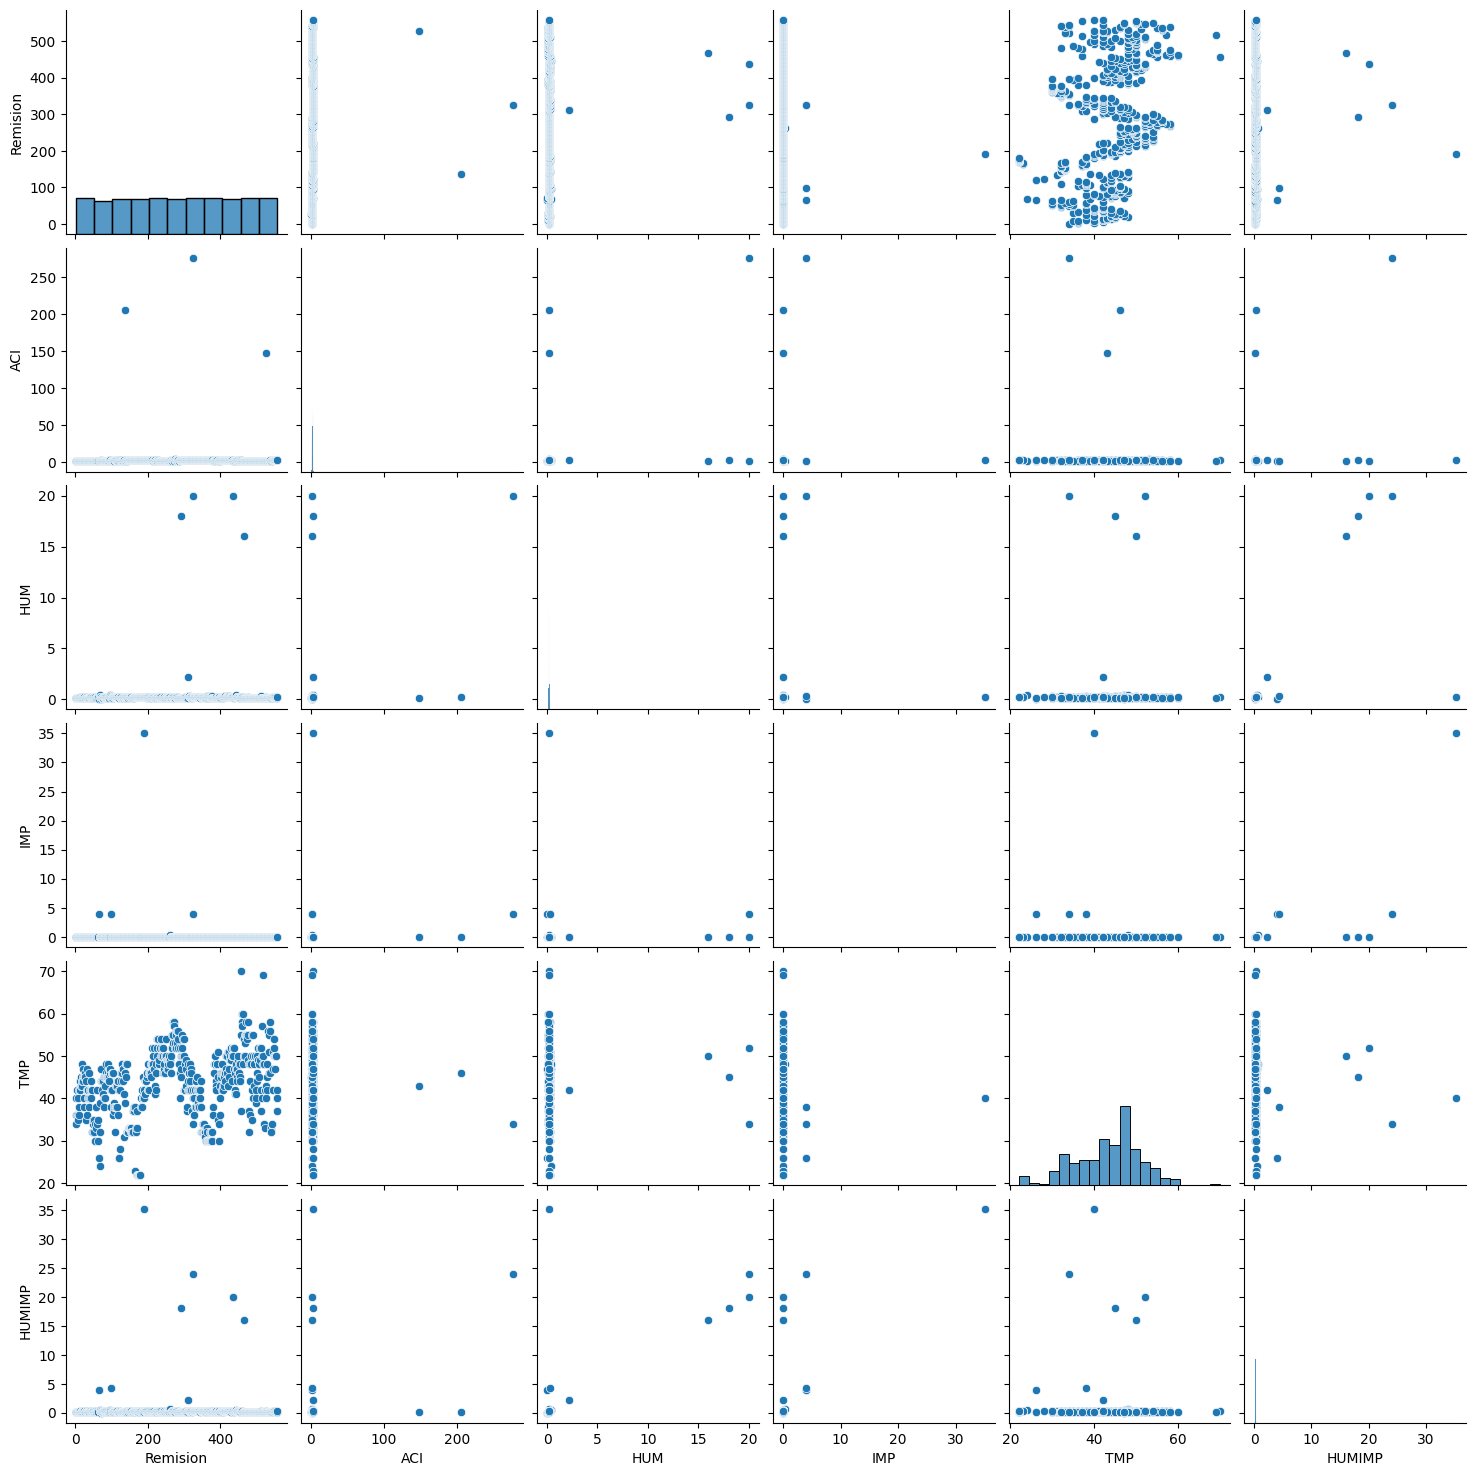

In [26]:
sns.pairplot(data)

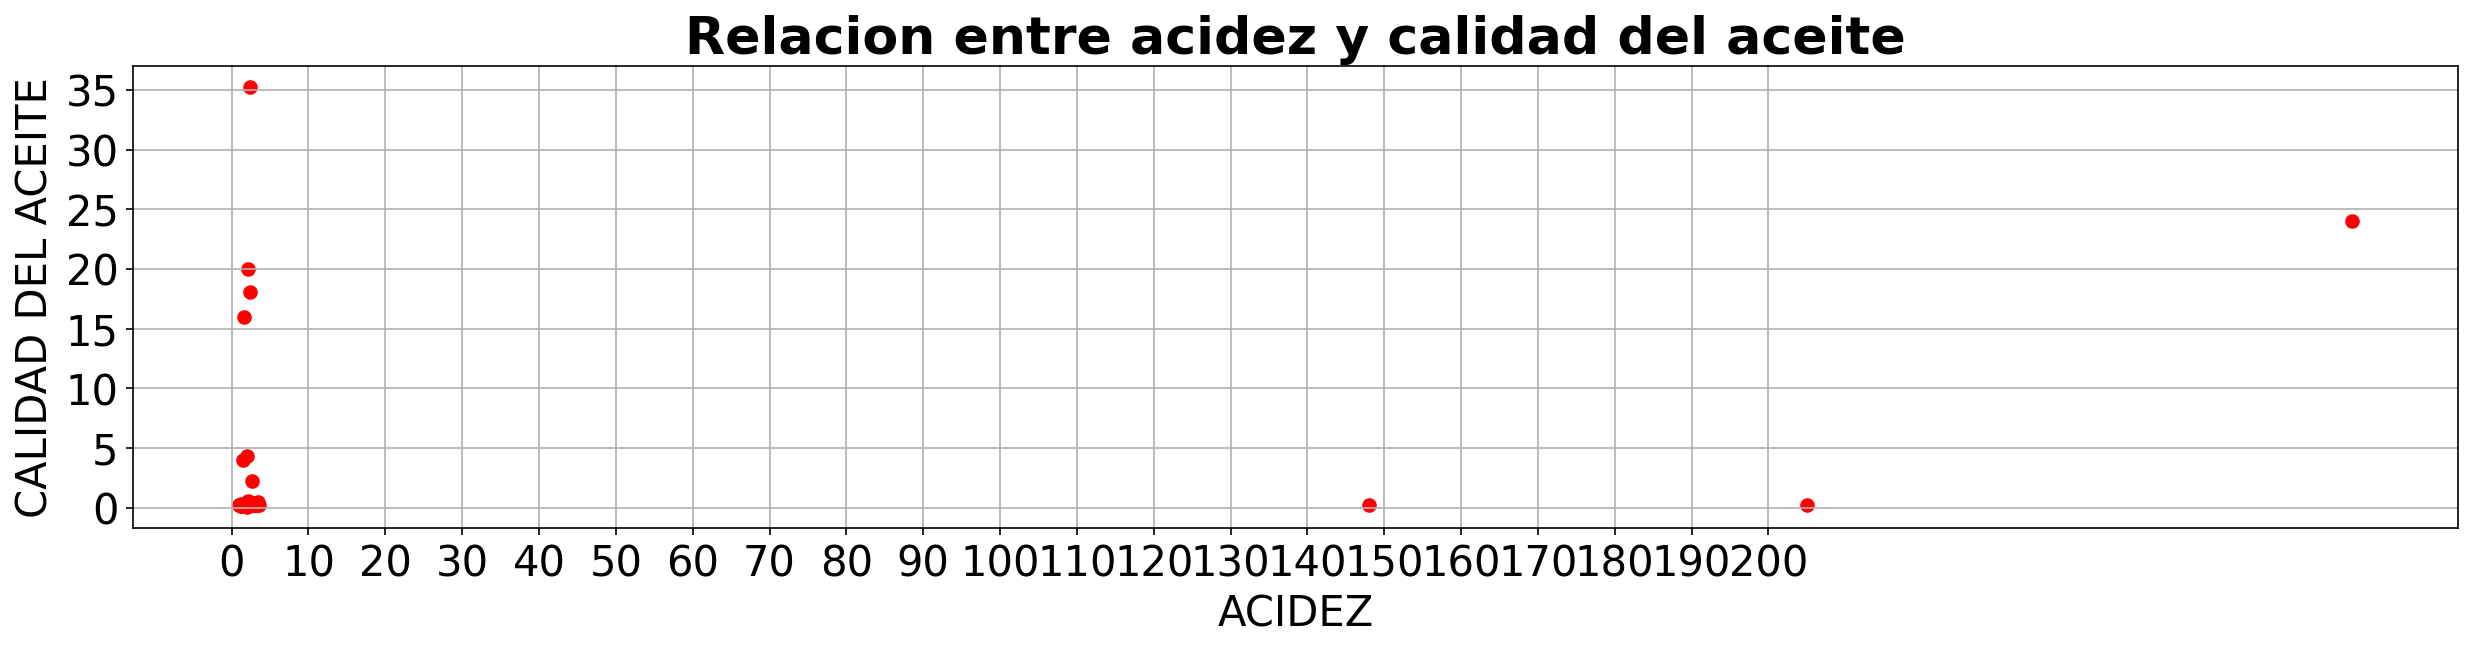

In [28]:
plt.figure(figsize = [20, 4] , dpi = 150)
plt.scatter (data["ACI"] , data["HUMIMP"] , color = "red")
plt.title ("Relacion entre acidez y calidad del aceite" , weight='bold', fontsize = 25)
plt.xticks (range (0 , 205 , 10), fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('ACIDEZ', fontsize = 20 )
plt.ylabel ('CALIDAD DEL ACEITE' , fontsize = 20)
plt.grid ()
plt.show ()

In [17]:
#Aprobado: ACI maximo 5%, HUM+IMP maximo 0.5% temperatura entre 30 y 50 grados
#De lo contrario es no aprobado
data['Aprobado'] = np.where((data['ACI']<=5) & (data['HUMIMP']<=0.5) & (data['TMP']>=30) & (data['TMP']<=50 ),'1','0')
data

<ipython-input-17-912b745720fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Aprobado'] = np.where((data['ACI']<=5) & (data['HUMIMP']<=0.5) & (data['TMP']>=30) & (data['TMP']<=50 ),'1','0')


,Remision,ACI,HUM,IMP,TMP,HUMIMP,Aprobado
0,1,1.59,0.16,0.035,34.0,0.195,1
1,2,1.54,0.16,0.035,36.0,0.195,1
2,3,1.59,0.16,0.035,40.0,0.195,1
3,4,1.48,0.18,0.035,36.0,0.215,1
4,5,1.54,0.16,0.035,42.0,0.195,1
...,...,...,...,...,...,...,...
549,554,2.41,0.18,0.030,50.0,0.210,1
550,555,2.61,0.20,0.030,50.0,0.230,1
551,556,2.71,0.18,0.030,37.0,0.210,1
552,557,2.71,0.20,0.030,40.0,0.230,1


In [18]:
data['Aprobado'].value_counts()

,count
Aprobado,
1,449
0,105


hay 449 registros que si estan dentro de los valores que se aceptan para despachar el aceite.
hay 105 registrtos que no se aceptan para despachar el aceite.

In [19]:
## Función de la librería de Pandas
pd.crosstab(index=data["Aprobado"],columns="count").reset_index()

col_0,Aprobado,count
0,0,105
1,1,449


In [ ]:
## Función para construir tablas de frecuencias
def tabla_freq(columna):
    x=pd.crosstab(index=columna,columns="count").reset_index()
    x=x.rename(columns={'count':'Frec. Abs.'})
    y=pd.crosstab(index=columna,columns="count", normalize='columns').reset_index()
    y=y.rename(columns={'count':'Frec. Rel.'})
    tabla=x.merge(y,how='left')
    tabla.rename_axis(None, axis=1)
    return tabla

In [ ]:
tabla_aprob = tabla_freq(data['Aprobado'])
tabla_aprob

col_0,Aprobado,Frec. Abs.,Frec. Rel.
0,0,105,0.189531
1,1,449,0.810469


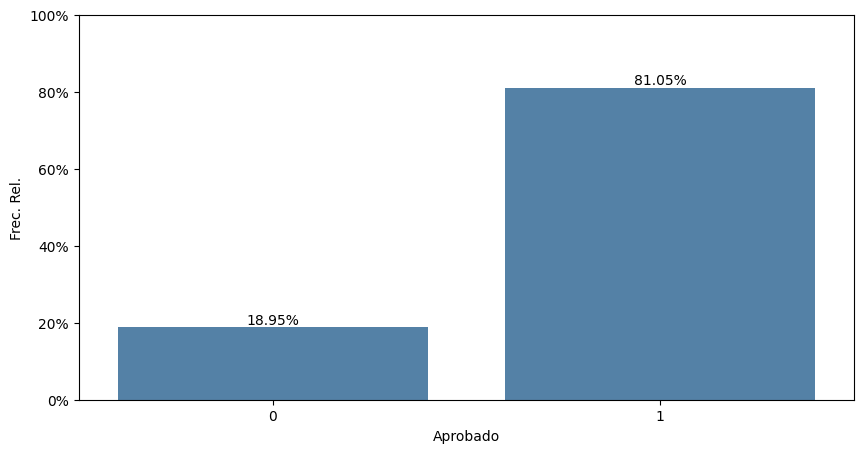

In [ ]:
plt.figure(figsize=(10,5))
frec_aprob=sns.barplot(x=tabla_aprob['Aprobado'],y=tabla_aprob["Frec. Rel."]*100, color="steelblue") ## aquí es el cambio
frec_aprob.bar_label(frec_aprob.containers[0], label_type='edge',fmt='%.2f%%')
frec_aprob.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
frec_aprob.set(ylim=(0, 100))
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


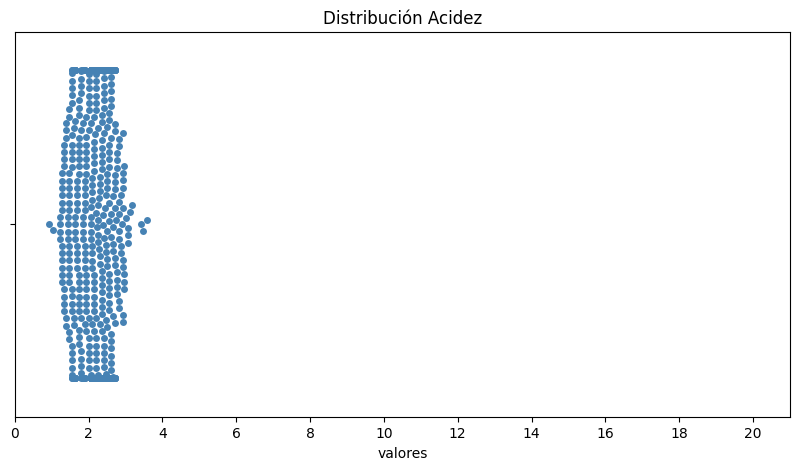

In [ ]:
plt.figure(figsize=(10,5))
swarmplot_G3=sns.swarmplot(x=data['ACI'],color='steelblue')
swarmplot_G3.set_xlabel('valores') ## cambia el título del eje x
swarmplot_G3.set_xlim(0, 21)                     ## cambia los límites del eje x
swarmplot_G3.set_xticks(range(0,22,2))               ## cambia los valores del eje x
swarmplot_G3.set_title('Distribución Acidez')
plt.show()

En esta grafica se ve que los valores solo estan entre 1,8 y 2,5. ya que esos son los datos que mas se presentan en el dataset. son los valores aceptados para la acidez.

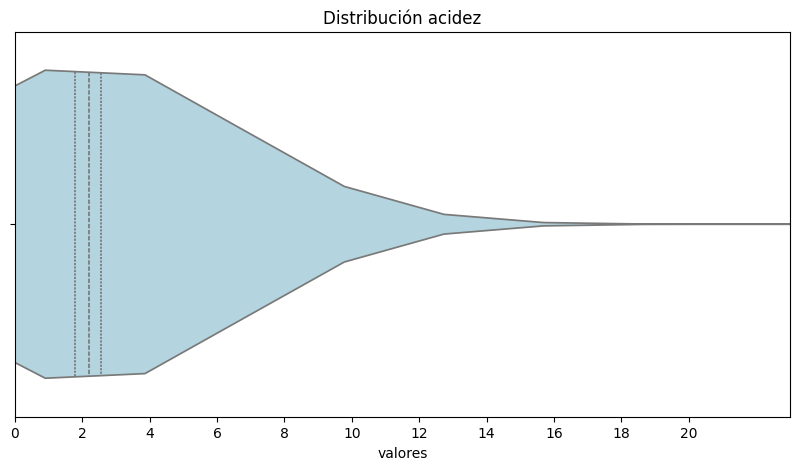

In [ ]:
plt.figure(figsize=(10,5))
violin_G3=sns.violinplot(x=data['ACI'],color="lightblue",inner="quart") ## crea el boxplot
violin_G3.set_xlabel('valores') ## cambia el título del eje x
violin_G3.set_xlim(0, 23)                     ## cambia los límites del eje x
violin_G3.set_xticks(range(0,22,2))               ## cambia los valores del eje x
violin_G3.set_title('Distribución acidez')
plt.show()

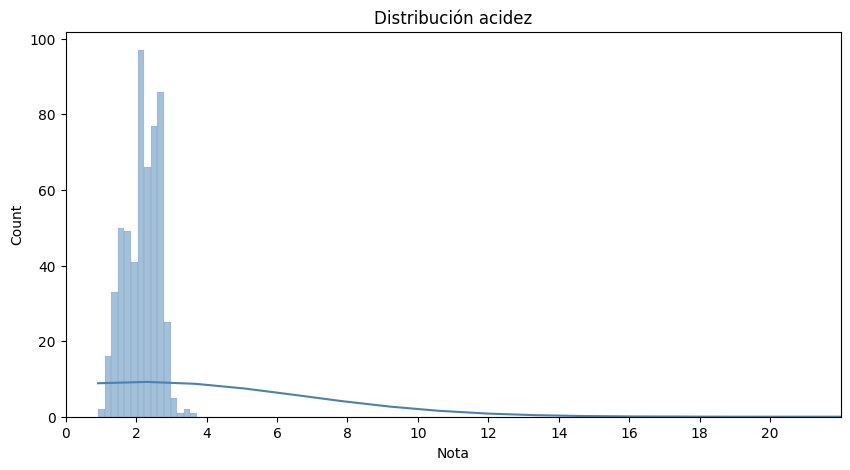

In [ ]:
plt.figure(figsize=(10,5))
hist_G3=sns.histplot(x=data['ACI'],kde=True,color="steelblue") ## crea el boxplot
hist_G3.set_xlabel('Nota') ## cambia el título del eje x
hist_G3.set_xlim(0, 22)                     ## cambia los límites del eje x
hist_G3.set_xticks(range(0,22,2))             ## cambia los valores del eje x
hist_G3.set_title('Distribución acidez')
plt.show()

Conclusión: El centro de la distribución está en 2 puntos, con el 50% de los datos agrupados alrededor de este centro entre 2 y 3 puntos. La dispersión de los datos es relativamente baja. Finalmente, es posible afirmar que la distribución es relativamente simétrica (muy leve sesgo a derecha).

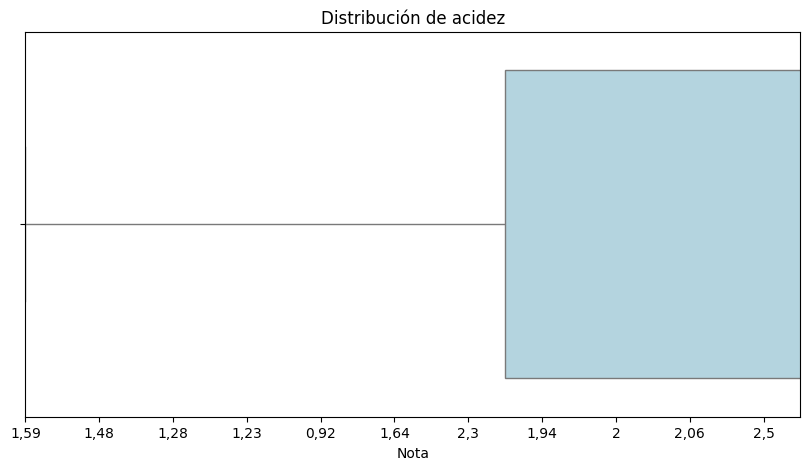

In [ ]:
plt.figure(figsize=(10,5))
boxplot_G3=sns.boxplot(x=data['ACI'],color="lightblue",showmeans=True) ## crea el boxplot
boxplot_G3.set_xlabel('Nota') ## cambia el título del eje x
boxplot_G3.set_xlim(0, 21)                     ## cambia los límites del eje x
boxplot_G3.set_xticks(range(0,22,2))               ## cambia los valores del eje x
boxplot_G3.set_title('Distribución de acidez')
plt.show()

In [ ]:
data.describe() #estadisticos descriptivos

,Remision,TMP
count,555.000000,554.000000
mean,281.354955,43.229242
std,161.266955,7.865033
min,1.000000,22.000000
25%,142.500000,38.000000
50%,282.000000,44.000000
75%,420.500000,48.000000
max,564.000000,70.000000


In [ ]:
df_clean=data.dropna() #eliminamos nulos

In [ ]:
#veamos cuantos nan tenemos en total
data.isna().sum().sum()

0

In [ ]:
df_clean.isna().sum()

,0
Remision,0
ACI,0
HUM,0
IMP,0
TMP,0
HUMIMP,0
Aprobado,0


In [ ]:
#Escojamos nuestras variables predictoras
predictores = ['TMP','ACI','HUMIMP']
#Escojamos que es lo que queremos encontrar
objetivo= 'Aprobado'

#Recordemos que en nuestra variable Y va lo que queremos encontrar/predecir.
#Mientras en la vairable X van las  variables que usaremos para encontrar a Y
y= df_clean[objetivo].values
X= df_clean[predictores].values


In [ ]:
# Crear conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(443, 3)
(111, 3)
(443,)
(111,)


In [ ]:
#Se crea el modelo
log_reg = LogisticRegression(solver='lbfgs',max_iter=1000)
#se entrena el modelo
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
log_reg.score(X_test, y_test)

0.8738738738738738

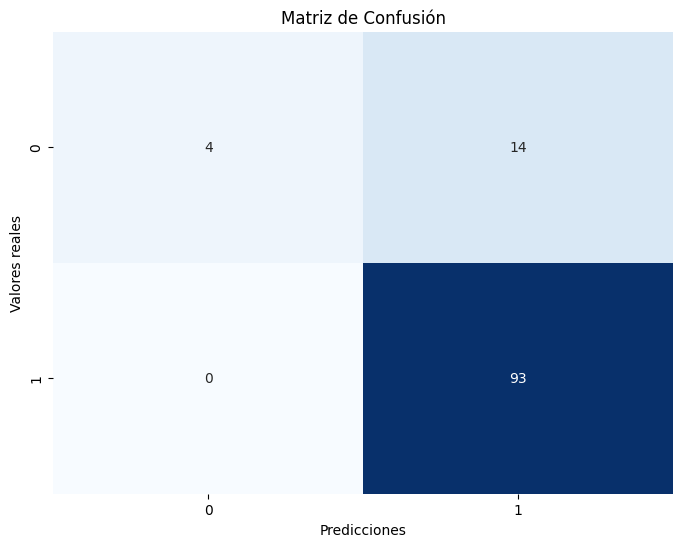


Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.22      0.36        18
           1       0.87      1.00      0.93        93

    accuracy                           0.87       111
   macro avg       0.93      0.61      0.65       111
weighted avg       0.89      0.87      0.84       111



In [ ]:
# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)


In [ ]:
# Paso 6: Guardar el modelo entrenado en un archivo para su uso posterior
# Guardar el modelo en un archivo usando pickle
import pickle
import pandas as pd

with open('modelo_reg.pkl', 'wb') as archivo_salida:
    pickle.dump(log_reg, archivo_salida)

# Verificar que se haya creado el modelo en el sistema de archivos
# Paso 7: Cargar el modelo desde el archivo y hacer una predicción
with open('modelo_reg.pkl', 'rb') as archivo_entrada:
    modelo_cargado = pickle.load(archivo_entrada)

# Crear un nuevo ejemplo de datos
#Aprobado: ACI maximo 5%, HUM+IMP maximo 0.5% temperatura entre 30 y 50 grados
nuevo_ejemplo = pd.DataFrame({
    ' TMP': [45],
    ' ACI': [5],
    ' HUMIMP': [0.5]
    })

# Hacer una predicción usando el modelo cargado
prediccion = modelo_cargado.predict(nuevo_ejemplo)
print("\nPredicción:", prediccion)


Predicción: ['0']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Deacuerdo a las entradas con las que probamos el modelo para la temperatura tomo com aprobado lo que esta por debajo de 50
y no era asi debe estar entre 30 y 50.
para las otras entradas de